In [2]:
% matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib as mpl
from datetime import datetime as dt
import matplotlib.pyplot as plt

mpl.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 8

In [5]:
ap = pd.read_csv('AP_tweets.csv')
bbc = pd.read_csv('BBCWorld_tweets.csv')
econ = pd.read_csv('TheEconomist_tweets.csv')
nash = pd.read_csv('NashvilleScene_tweets.csv')
nc5 = pd.read_csv('NC5_tweets.csv')
time = pd.read_csv('TIME_tweets.csv')

In [151]:
def generate_dates_and_values_df(user):
    data = user
    datacopy = data.copy(deep=True)
    dates = datacopy['created_at']
    dates2 = []
    dates3 = []
    dates4 = []
    for d in dates:
        d = dt.strptime(d, '%Y-%m-%d %H:%M:%S')
        dates2.append(d)
    dates2 = sorted(dates2)
    for d in dates2:
        g = str(d.year) + '-' + str(d.month) + '-' + str(d.day)
        dates3.append(g)
    for d in dates3: 
        d = dt.strptime(d, '%Y-%m-%d')
        dates4.append(d)
    datesseries = pd.Series(dates4)
    datesseries2 = datesseries.unique()
    values = datesseries.value_counts()
    values_indateorder = []
    for item in datesseries2:
        values_indateorder.append(values.get(item))
    datesseriesdf = pd.DataFrame(datesseries2)
    datesseriesdf['# Tweets'] = values_indateorder
    datesseriesdf.rename(columns = {0 :'Datetime'}, inplace = True)
    return datesseriesdf

In [154]:
# Cut to 10-28-17 or after
def trim_to_same_dates(user):
    data = generate_dates_and_values_df(user)
    comparison = dt.strptime('28Oct2017', '%d%b%Y')
    for index, row in data.iterrows():
        if row['Datetime'] < comparison:
            data.drop(index, inplace=True)
    newdates = []
    for d in data['Datetime']:
        d = str(d.month) + '-' + str(d.day)
        newdates.append(d)
    data['Date'] = newdates
    del data['Datetime']
    return data

In [213]:
apdf = trim_to_same_dates(ap)
apdf.reset_index(inplace=True)
del apdf['index']

bbcdf = trim_to_same_dates(bbc)
bbcdf.reset_index(inplace=True)
del bbcdf['index']

econdf = trim_to_same_dates(econ)
econdf.reset_index(inplace=True)
del econdf['index']

nashdf = trim_to_same_dates(nash)
nashdf.reset_index(inplace=True)
del nashdf['index']

nc5df = trim_to_same_dates(nc5)
nc5df.reset_index(inplace=True)
del nc5df['index']

timedf = trim_to_same_dates(time)
timedf.reset_index(inplace=True)
del timedf['index']

<IPython.core.display.Javascript object>


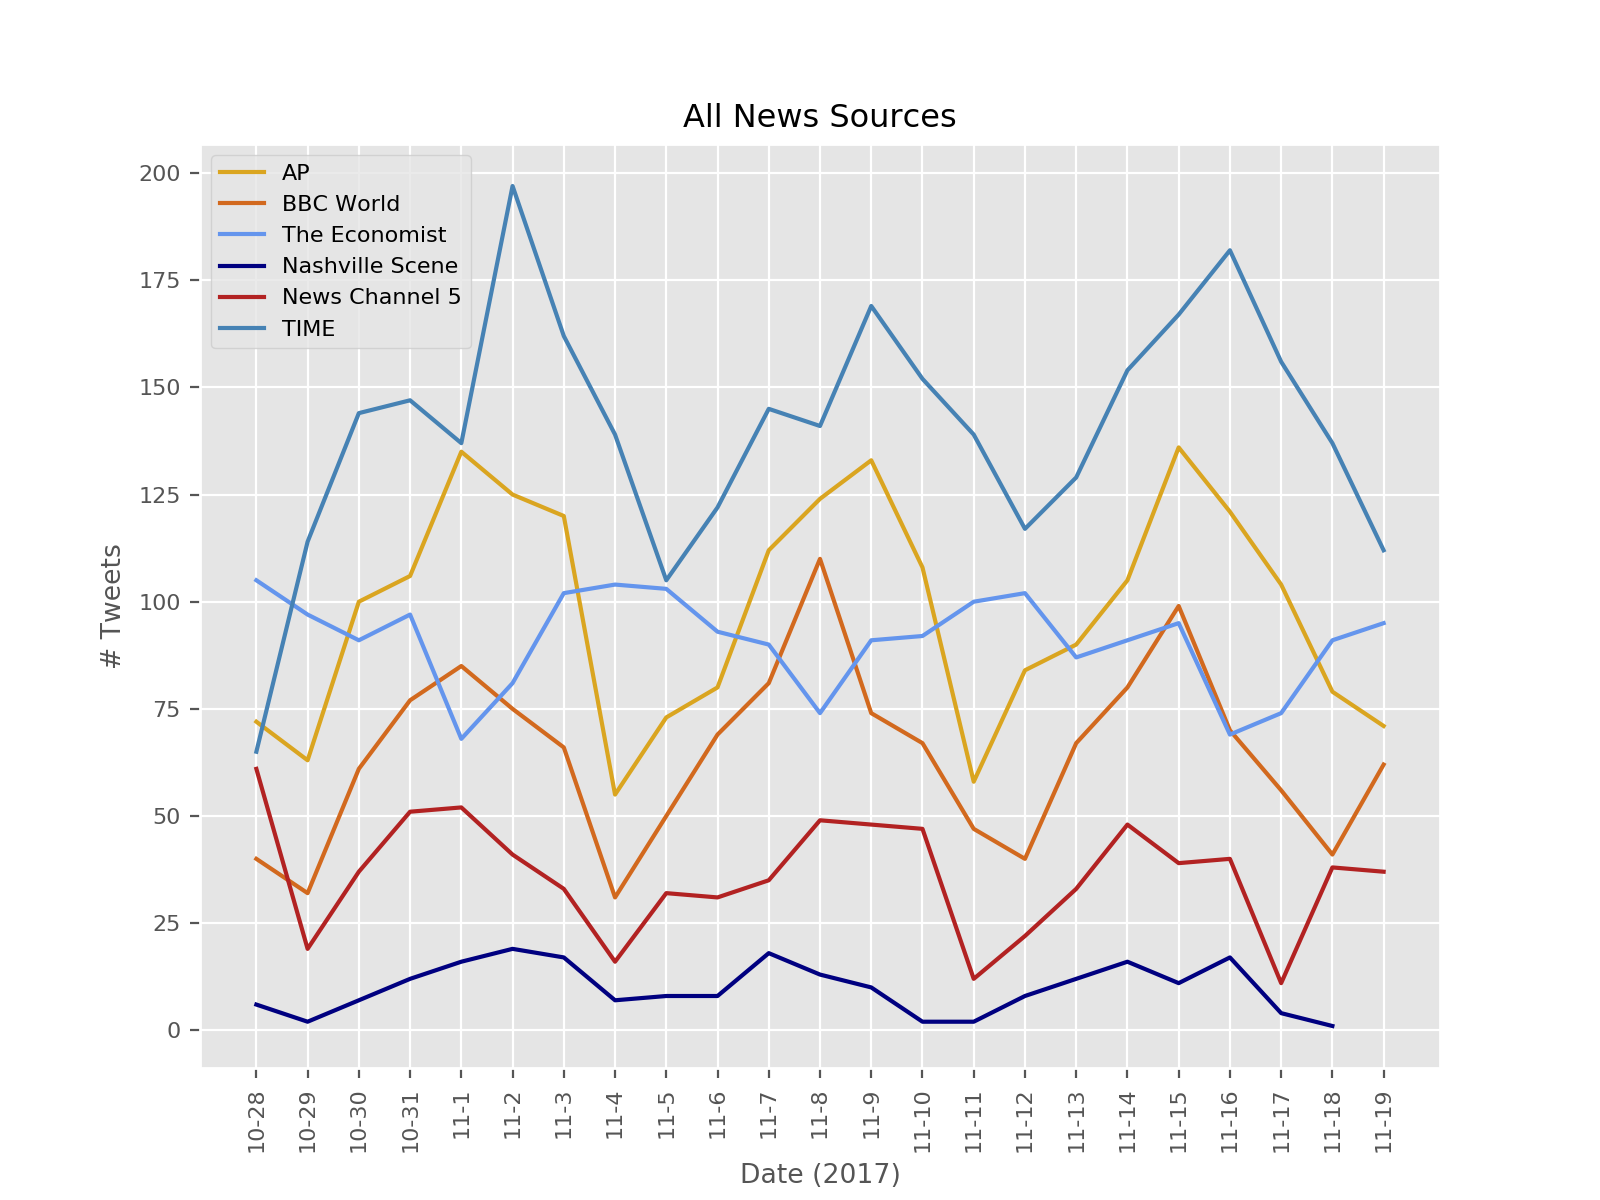

In [226]:
ap_x = apdf.index.get_values()
ap_y = apdf['# Tweets']
labels = apdf['Date']
plt.plot(ap_x, ap_y, c='goldenrod')
plt.xticks(ap_x, labels, rotation='vertical')
bbc_x = bbcdf.index.get_values()
bbc_y = bbcdf['# Tweets']
plt.plot(bbc_x, bbc_y, c='chocolate')
econ_x = econdf.index.get_values()
econ_y = econdf['# Tweets']
plt.plot(econ_x, econ_y, c='cornflowerblue')
nash_x = nashdf.index.get_values()
nash_y = nashdf['# Tweets']
plt.plot(nash_x, nash_y, c='navy')
nc5_x = nc5df.index.get_values()
nc5_y = nc5df['# Tweets']
plt.plot(nc5_x, nc5_y, c='firebrick')
time_x = timedf.index.get_values()
time_y = timedf['# Tweets']
plt.plot(time_x, time_y, c='steelblue')
plt.legend(['AP', 'BBC World', 'The Economist', 'Nashville Scene', 'News Channel 5', 'TIME'], loc=2)
plt.title('All News Sources')
plt.xlabel('Date (2017)')
plt.ylabel('# Tweets')